PROJECT 10: MARKET BASKET INSIGHTS

PHASE 5: DOCUMENTATION

PROBLEM DEFINITION:
The problem is to perform market basket analysis on a provided dataset to unveil hidden patterns and associations between products. The goal is to understand customer purchasing behavior and identify potential cross-selling opportunities for a retail business. This project involves using association analysis techniques, such as Apriori algorithm, to find frequently co-occurring products and generate insights for business optimization.


INTRODUCTION
Market Basket Analysis is a potent technique for uncovering item associations in customer purchases. This analysis enables us to enhance business decisions and strategies by revealing customer buying patterns. In this notebook, we will explore a retail or e-commerce dataset, delving into customer transaction data to extract insights. By applying data mining and association rule mining algorithms, we will discover relationships between items and actionable insights. These insights can be used to optimize product recommendations, cross-selling, upselling, store layouts, and promotional campaigns. This notebook will guide you through the entire Market Basket Analysis process, providing a valuable understanding of customer behavior and business strategy optimization. Let's begin our journey into the secrets of customer purchasing behavior.

Overview of the Market Basket Analysis dataset
This dataset contains 522,065 rows and 7 attributes that provide valuable information about customer transactions and product details.
This dataset includes the following attributes:

BillNo: A 6-digit number serving as a unique transaction identifier.

Itemname: The name of the purchased product, providing details on the items.

Quantity: A numeric value indicating the quantity of each product bought in a transaction.

Date: Records the date and time of each transaction, offering timing insights.

Price: Represents the cost of a single unit of the item, given as a numeric value.

CustomerID: A 5-digit unique identifier for each customer, useful for tracking individual buying patterns.

Country: Indicates the customer's residing country, providing information on geographic regions.

By analyzing this dataset, we can gain insights into customer purchasing behavior, identify popular products, examine sales trends over time, and explore the impact of factors such as price and geography on customer preferences. These insights can be used to optimize marketing strategies, improve inventory management, and enhance customer satisfaction.

Data Preprocessing

Importing Required Libraries

Data Loading
Retrieving and Loading the Dataset

In [43]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset with the specified delimiter
df = pd.read_csv('/content/drive/MyDrive/Nan mudhlvn/Assignment-1_Data.csv', delimiter=';' , parse_dates=['Date'])

# Print the first few rows to inspect the data
print(df.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-44-960d36f8868e>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Nan mudhlvn/Assignment-1_Data.csv', delimiter=';' , parse_dates=['Date'])


   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-01-12 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-01-12 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-01-12 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-01-12 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-01-12 08:26:00   

  Price  CustomerID         Country  
0  2,55     17850.0  United Kingdom  
1  3,39     17850.0  United Kingdom  
2  2,75     17850.0  United Kingdom  
3  3,39     17850.0  United Kingdom  
4  3,39     17850.0  United Kingdom  


In [45]:
df['Price'] = df['Price'].str.replace(',', '.').astype('float64') # Convert the 'Price' column to float64 data type after replacing commas with dots

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
df.info() # Display the information about the DataFrame which is to provide an overview of the DataFrame's structure and column data types.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [47]:
# Calculate the number of missing values for each column and sort them in descending order
df.isna().sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerID    134041
Itemname        1455
BillNo             0
Quantity           0
Date               0
Price              0
Country            0
dtype: int64

In [48]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
df['Quantity'].fillna(0, inplace=True)
df['Price'].fillna(0, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# Calculate the total price by multiplying the quantity and price columns
df['Total_Price'] = df.Quantity * df.Price

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
df.describe(include='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-51-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total_Price
count,522064.0,520609,522064.000000,522064,522064.000000,388023.000000,522064,522064.000000
unique,21665.0,4185,NaN,19641,NaN,NaN,30,NaN
top,573585.0,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,NaN
freq,1114.0,2269,NaN,1114,NaN,NaN,487622,NaN
first,NaN,NaN,NaN,2010-01-12 08:26:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2011-12-10 17:19:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.090435,NaN,3.826801,15316.931710,NaN,19.690633
std,NaN,NaN,161.110525,NaN,41.900599,1721.846964,NaN,273.068938
min,NaN,NaN,-9600.000000,NaN,-11062.060000,12346.000000,NaN,-11062.060000
25%,NaN,NaN,1.000000,NaN,1.250000,13950.000000,NaN,3.750000


In [52]:
# Print the number of unique countries in the 'Country' column
print("Number of unique countries:", df['Country'].nunique())

# Calculate and print the normalized value counts of the top 5 countries in the 'Country' column
print(df['Country'].value_counts(normalize=True)[:5])

Number of unique countries: 30
United Kingdom    0.934027
Germany           0.017320
France            0.016105
Spain             0.004760
Netherlands       0.004526
Name: Country, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# Delete the 'Country' column from the DataFrame
df.drop('Country', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
df[df['BillNo'].str.isdigit() == False] # Here to check if all BillNo doesn't inculde letters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
288772,A563185,Adjust bad debt,1,2011-12-08 14:50:00,11062.06,NaN,11062.06
288773,A563186,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,NaN,-11062.06
288774,A563187,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,NaN,-11062.06


In [55]:
# Remove rows where the 'Itemname' column contains "Adjust bad debt"
df = df[df['Itemname'] != "Adjust bad debt"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# Here to check if all BillNo doesn't inculde letters
df['BillNo'].astype("int64")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
522059    581587
522060    581587
522061    581587
522062    581587
522063    581587
Name: BillNo, Length: 522061, dtype: int64

In [57]:
# Calculate the sum of 'Price' for rows where 'Itemname' is missing
df[df['Itemname'].isna()] ['Price'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.0

Exploring Rows with Missing Item Names:

To investigate the data where the 'Itemname' column has missing values, we can filter the dataset to display only those rows. This subset of the data will provide insights into the records where the item names are not available.

In [58]:
# Filter the DataFrame to display rows where 'Itemname' is missing
df[df['Itemname'].isna()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
613,536414,NaN,56,2010-01-12 11:52:00,0.0,NaN,0.0
1937,536545,NaN,1,2010-01-12 14:32:00,0.0,NaN,0.0
1938,536546,NaN,1,2010-01-12 14:33:00,0.0,NaN,0.0
1939,536547,NaN,1,2010-01-12 14:33:00,0.0,NaN,0.0
1940,536549,NaN,1,2010-01-12 14:34:00,0.0,NaN,0.0
...,...,...,...,...,...,...,...
515623,581199,NaN,-2,2011-07-12 18:26:00,0.0,NaN,-0.0
515627,581203,NaN,15,2011-07-12 18:31:00,0.0,NaN,0.0
515633,581209,NaN,6,2011-07-12 18:35:00,0.0,NaN,0.0
517266,581234,NaN,27,2011-08-12 10:33:00,0.0,NaN,0.0


Upon examining the data where the 'Itemname' column has missing values, it becomes evident that these missing entries do not contribute any meaningful information. Given that the item names are not available for these records, it suggests that these instances may not be crucial for our analysis. As a result, we can consider these missing values as non-significant and proceed with our analysis without incorporating them.

In [59]:
# Filter the DataFrame to exclude rows where 'Itemname' is missing (not NaN)
df = df[df['Itemname'].notna()]

# Print the number of unique items in the 'Itemname' column
print("Number of unique items:", df['Itemname'].nunique())

# Calculate and print the normalized value counts of the top 5 items in the 'Itemname' column
print(df['Itemname'].value_counts(normalize=True)[:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique items: 4184
WHITE HANGING HEART T-LIGHT HOLDER    0.004358
JUMBO BAG RED RETROSPOT               0.004009
REGENCY CAKESTAND 3 TIER              0.003707
PARTY BUNTING                         0.003221
LUNCH BAG RED RETROSPOT               0.003016
Name: Itemname, dtype: float64


A curious observation has caught our attention—the presence of a negative quantity in the 515,623rd row.

we are intrigued by the existence of negative quantities within the dataset. To gain a deeper understanding of this phenomenon, we focus our attention on these specific instances and aim to uncover the underlying reasons behind their occurrence. Through this exploration, we expect to gain valuable insights into the nature of these negative quantities and their potential impact on our analysis. Our investigation aims to reveal the intriguing stories that lie within this aspect of the data.

In [60]:
# Filter the DataFrame to display rows where 'Quantity' is less than 1
df[df['Quantity'] < 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
7122,537032,?,-30,2010-03-12 16:50:00,0.0,NaN,-0.0
12926,537425,check,-20,2010-06-12 15:35:00,0.0,NaN,-0.0
12927,537426,check,-35,2010-06-12 15:36:00,0.0,NaN,-0.0
12973,537432,damages,-43,2010-06-12 16:10:00,0.0,NaN,-0.0
20844,538072,faulty,-13,2010-09-12 14:10:00,0.0,NaN,-0.0
...,...,...,...,...,...,...,...
515634,581210,check,-26,2011-07-12 18:36:00,0.0,NaN,-0.0
515636,581212,lost,-1050,2011-07-12 18:38:00,0.0,NaN,-0.0
515637,581213,check,-30,2011-07-12 18:38:00,0.0,NaN,-0.0
517209,581226,missing,-338,2011-08-12 09:56:00,0.0,NaN,-0.0


Given the observation that negative quantities might be filled with system issues or irrelevant information for our analysis, it is reasonable to proceed with removing these rows from the dataset. By doing so, we can ensure the accuracy and reliability of our data, as well as eliminate potential biases or misleading information stemming from negative quantities.

In [61]:
# Remove rows where 'Quantity' is less than 1
df = df[df['Quantity'] >= 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Next, we turn our attention to the presence of missing values in the 'CustomerID' column. By investigating these missing values, we aim to identify any potential issues or data quality concerns associated with them. Analyzing the impact of missing 'CustomerID' values will help us assess the completeness and reliability of the dataset, enabling us to make informed decisions on handling or imputing these missing values. Let's dive deeper into this aspect and gain a comprehensive understanding of any issues related to missing 'CustomerID' values.

In [62]:
# Select a random sample of 30 rows where 'CustomerID' is missing
df[df['CustomerID'].isna()].sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
177448,552668,BLACK MINI TAPE MEASURE,1,2011-10-05 15:05:00,1.63,NaN,1.63
247578,559506,MILK PAN BLUE POLKADOT,1,2011-08-07 15:17:00,3.29,NaN,3.29
248004,559518,DOTCOM POSTAGE,1,2011-08-07 16:11:00,92.88,NaN,92.88
18104,537823,FAIRY CAKES NOTEBOOK A6 SIZE,1,2010-08-12 14:25:00,1.49,NaN,1.49
155039,550470,VINTAGE PAISLEY STATIONERY SET,2,2011-04-18 13:49:00,2.46,NaN,4.92
157472,550541,JUMBO BAG BAROQUE BLACK WHITE,3,2011-04-19 11:33:00,4.13,NaN,12.39
247254,559493,GLITTER HEART GARLAND WITH BELLS,1,2011-08-07 13:53:00,7.46,NaN,7.46
198033,554714,JUMBO BAG SPACEBOY DESIGN,1,2011-05-26 10:44:00,4.13,NaN,4.13
339080,567671,ICE CREAM DESIGN GARDEN PARASOL,1,2011-09-21 15:34:00,10.79,NaN,10.79
460052,577078,SET 10 CARDS SNOWY SNOWDROPS 17100,1,2011-11-17 15:17:00,2.49,NaN,2.49


This sample can provide us with a glimpse into the specific instances where 'CustomerID' is missing, aiding us in further analysis or decision-making related to handling these missing values.

Upon analyzing a sample of rows where the 'CustomerID' is missing, it appears that there is no discernible pattern or specific reason behind the absence of these values. This observation suggests that the missing 'CustomerID' entries were not filled accidentally or due to a systematic issue. Instead, it is possible that these missing values occur naturally in the dataset, without any particular significance or underlying cause.

dentifying Issues in the Price Column: Ensuring Data Quality
In our analysis, we shift our focus to the 'Price' column and investigate it for any potential issues or anomalies. By thoroughly examining the data within this column, we aim to identify any irregularities, inconsistencies, or outliers that may affect the overall quality and integrity of the dataset. Analyzing the 'Price' column is crucial in ensuring accurate and reliable pricing information for our analysis. Let's dive deeper into the 'Price' column and uncover any issues that may require attention.

In [63]:
# Counting the number of rows where the price is zero
zero_price_count = len(df[df['Price'] == 0])
print("Number of rows where price is zero:", zero_price_count)

# Counting the number of rows where the price is negative
negative_price_count = len(df[df['Price'] < 0])
print("Number of rows where price is negative:", negative_price_count)

Number of rows where price is zero: 583
Number of rows where price is negative: 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


our attention now turns to the presence of zero charges in the 'Price' column. It is important to explore instances where products were offered free of cost, as this information can provide valuable insights into promotional activities, giveaways, or other unique aspects of the dataset. By examining the data related to zero charges in the 'Price' column, we can gain a deeper understanding of these transactions and their potential impact on our analysis. Let's delve into the details of these zero-priced transactions and uncover any significant findings.

In [64]:
# Selecting a random sample of 20 rows where the price is zero
df[df['Price'] == 0].sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
40261,539856,FRENCH BLUE METAL DOOR SIGN 6,1,2010-12-22 14:41:00,0.0,NaN,0.0
101150,545176,FRENCH BLUE METAL DOOR SIGN 8,1,2011-02-28 14:19:00,0.0,NaN,0.0
332071,567129,found box,24,2011-09-16 14:05:00,0.0,NaN,0.0
186587,553521,CHILDS GARDEN TROWEL BLUE,1,2011-05-17 14:35:00,0.0,NaN,0.0
6276,536942,amazon,15,2010-03-12 12:08:00,0.0,NaN,0.0
51907,540832,REGENCY CAKESTAND 3 TIER,1,2011-11-01 14:42:00,0.0,NaN,0.0
40284,539856,ENAMEL WASH BOWL CREAM,2,2010-12-22 14:41:00,0.0,NaN,0.0
186596,553521,GLASS JAR MARMALADE,1,2011-05-17 14:35:00,0.0,NaN,0.0
101137,545176,CHILDRENS GARDEN GLOVES BLUE,1,2011-02-28 14:19:00,0.0,NaN,0.0
269127,561284,OVAL WALL MIRROR DIAMANTE,1,2011-07-26 12:24:00,0.0,16818.0,0.0


Removing Rows with Zero Price: Eliminating Misleading Data Entries
Upon reviewing the sample of rows where the price is zero, we have identified that these entries might provide misleading or inaccurate information for our analysis. Therefore, it is prudent to proceed with removing these rows from the dataset to ensure the integrity and reliability of our analysis.

In [65]:
# Remove rows where the price is zero
df = df[df['Price'] != 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Data Understanding: Exploring and Interpreting the Dataset
In the data analysis process, data understanding plays a crucial role in gaining insights and formulating meaningful conclusions. By thoroughly examining the dataset, we aim to understand its structure, contents, and underlying patterns. This understanding empowers us to make informed decisions regarding data cleaning, feature engineering, and subsequent analysis steps.

By thoroughly understanding the dataset, we lay the foundation for meaningful data analysis and generate insights that contribute to informed decision-making and problem-solving.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'Date (Month)')

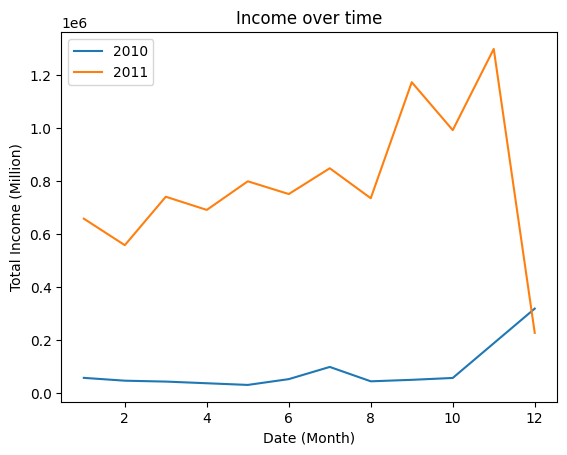

In [66]:
#Data understanding and Exploring
# Grouping the data by month and summing the total price for the year 2010
df[df["Date"].dt.year == 2010].groupby(df["Date"].dt.month)["Total_Price"].sum().plot()

# Grouping the data by month and summing the total price for the year 2011
df[df["Date"].dt.year == 2011].groupby(df["Date"].dt.month)["Total_Price"].sum().plot()

# Adding legend and plot labels
plt.legend(["2010", "2011"])
plt.title("Income over time")
plt.ylabel('Total Income (Million)')
plt.xlabel("Date (Month)")


This code snippet creates a line plot to show income over time for the years 2010 and 2011. It first filters the data by year, groups it by month, and sums the monthly income. Then, it generates two line plots, one for each year, with a legend indicating the respective years. The plot has a title, y-axis label, and x-axis label.

Looking at the plot, income remained fairly steady until October 2010, suggesting business growth. However, there's a significant drop in sales in the last month, which is unusual. To check if the data is complete for that last month, we can compare the highest date in the 'Date' column with the last day of that month. If they match, the data is complete for the entire last month.

In [67]:
df["Date"].max()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Timestamp('2011-12-10 17:19:00')

Since we've discovered that data is only available for 10 days in the last month, it's clear that the significant sales drop is likely due to incomplete data rather than a real sales decline. The limited data for that month doesn't give us the full picture of sales performance.

To get a more accurate understanding of the sales trend, it's better to look at a longer time frame with complete data. Analyzing a more extended period, which covers several months or years, will provide a more reliable assessment of sales performance and enable us to draw more meaningful insights and conclusions.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


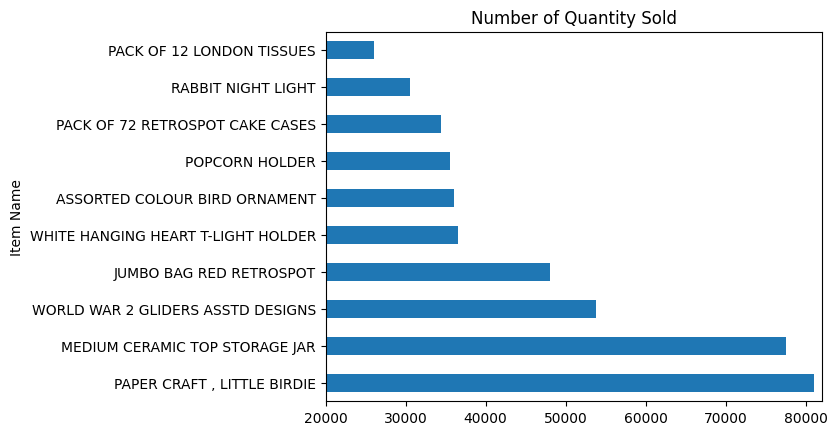

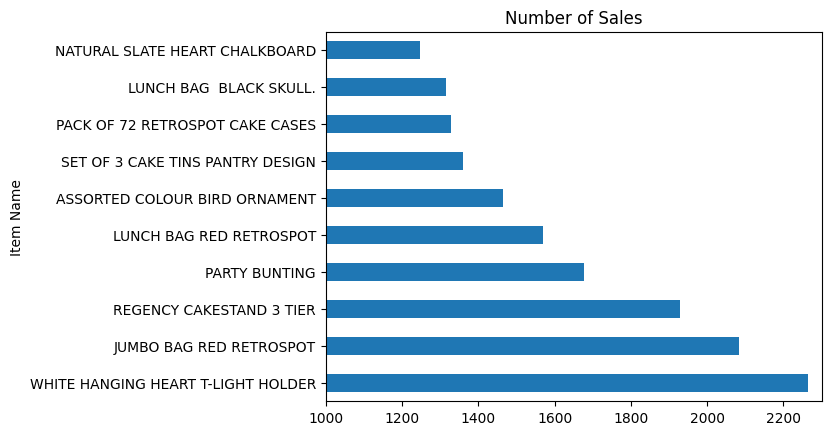

In [68]:
# Plotting the top 10 most sold products by quantity
df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Number of Quantity Sold')
plt.ylabel('Item Name')
plt.xlim(20000, 82000)
plt.show()

# Plotting the top 10 most sold products by count
df['Itemname'].value_counts(ascending=False)[:10].plot(kind='barh', title='Number of Sales')
plt.ylabel('Item Name')
plt.xlim(1000, 2300)
plt.show()

The provided code creates two horizontal bar plots to show the most popular products based on quantity and sales count.

In the first plot, it finds the top 10 items with the highest total quantities sold by summing the 'Quantity' for each 'Itemname' and sorting them. This plot displays the quantities sold for each item.

The second plot reveals the top 10 items based on the count of times each unique 'Itemname' appears in sales. The function counts how often each item is sold and sorts them accordingly. This plot shows how frequently each item is sold.

From these plots, we can see that some products are sold more frequently (higher count) but in smaller quantities per transaction. This suggests that some items are commonly bought in larger quantities at once. This might include bulk items or products sold in larger packages.

This insight emphasizes the importance of considering both quantity and sales count when analyzing product popularity and customer behavior. It helps with inventory management, pricing strategies, and understanding customer preferences.

Association Rules

Association rules are produced through the Apriori algorithm, a common method for finding connections between items in a dataset. It's frequently used in market basket analysis to discover associations between items often bought together.

Each association rule consists of two parts: the "antecedent" (the condition or premise) and the "consequent" (the prediction or outcome).

We assess these rules using metrics like support, confidence, lift, leverage, and conviction, which measure the strength and significance of these rules.

Support checks how often both antecedent and consequent appear together.
Confidence measures the likelihood of the consequent when the antecedent is true.
Lift assesses the strength of the association.
Leverage gauges the significance of the association.
Conviction indicates the dependency between antecedent and consequent.
Analyzing association rules helps identify relationships among items. This knowledge can be applied to product recommendations, market segmentation, or inventory management.

We use the Apriori algorithm with a minimum support threshold of 0.05 (5%) to generate these rules, ensuring we consider only sufficiently frequent itemsets in the dataset. Let's explore these association rules.







In [69]:
#Association Rules
# Assign the original DataFrame to df2
df2 = df

# Filter rows based on item occurrences
item_counts = df2['Itemname'].value_counts(ascending=False)
filtered_items = item_counts.loc[item_counts > 1].reset_index()['index']
df2 = df2[df2['Itemname'].isin(filtered_items)]

# Filter rows based on bill number occurrences
bill_counts = df2['BillNo'].value_counts(ascending=False)
filtered_bills = bill_counts.loc[bill_counts > 1].reset_index()['index']
df2 = df2[df2['BillNo'].isin(filtered_bills)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Filtering is done based on item occurrences:

    The frequency count of each unique item name in the 'Itemname' column is calculated and stored in item_counts.
    filtered_items is created by filtering item_counts to retain only item names that occur more than once.
    Rows in df2 are filtered to keep only those where the item name in the 'Itemname' column is present in the filtered_items list.
Filtering is done based on bill number occurrences:

    The frequency count of each unique bill number in the 'BillNo' column is calculated and stored in bill_counts.
    filtered_bills is created by filtering bill_counts to retain only bill numbers that occur more than once.
    Rows in df2 are filtered to keep only those where the bill number in the 'BillNo' column is present in the filtered_bills list.

After executing the code, the filtered DataFrame df2 will contain only the rows where both the item name and bill number occur more than once in the original df.

In [70]:
# Create a pivot table using the filtered DataFrame
pivot_table = pd.pivot_table(df2[['BillNo','Itemname']], index='BillNo', columns='Itemname', aggfunc=lambda x: True, fill_value=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The code creates a pivot table that represents the occurrence of items in bills. The pivot table provides a binary representation where each cell indicates whether a specific item appears in a particular bill. Here's how it works:



The original DataFrame df2 contains information about bills and corresponding item names.
By using the pd.pivot_table() function, we reshape the DataFrame to create a pivot table.
The pivot table has 'BillNo' as the index and 'Itemname' as the columns, grouping the data based on these two columns.

The goal is to determine whether a specific item appears in a particular bill.
Each cell in the pivot table is filled with either True or False:

    If an item appears in a bill, the corresponding cell is marked as True.
    If an item does not appear in a bill, the corresponding cell is marked as False.
This binary representation of item occurrence in bills allows us to easily analyze and identify patterns or associations between different items and bills.



The resulting pivot table provides a concise summary of the occurrence of items in bills, which can be used for various purposes such as market basket analysis, recommendation systems, or identifying frequent itemsets and association rules.

In [71]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Generate frequent itemsets with minimum support of 0.02 (20%)
frequent_itemsets = apriori(pivot_table, min_support=0.02,use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, "confidence", min_threshold = 0.5)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print association rules
print("\nAssociation Rules:")
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
      support                                           itemsets
0    0.020599                 (3 HOOK PHOTO SHELF ANTIQUE WHITE)
1    0.020710               (3 PIECE SPACEBOY COOKIE CUTTER SET)
2    0.025443                         (3 STRIPEY MICE FELTCRAFT)
3    0.025777                      (4 TRADITIONAL SPINNING TOPS)
4    0.052444                           (6 RIBBONS RUSTIC CHARM)
..        ...                                                ...
454  0.028616  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...
455  0.021156  (REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...
456  0.020989  (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...
457  0.022937  (JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSP...
458  0.021601  (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...

[459 rows x 2 columns]

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.044427,0.071206,0.024218,0.545113,7.655446,0.021054,2.041812,0.909794
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.042256,0.053558,0.022882,0.541502,10.110664,0.020619,2.064224,0.940851
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.057121,0.053558,0.035241,0.616959,11.519562,0.032182,2.470865,0.968513
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.053558,0.057121,0.035241,0.658004,11.519562,0.032182,2.756991,0.964867
4,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE RED),0.031121,0.057121,0.020488,0.658318,11.525064,0.018710,2.759527,0.942566
...,...,...,...,...,...,...,...,...,...,...
78,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.028616,0.113963,0.022937,0.801556,7.033491,0.019676,4.464933,0.883094
79,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...",(JUMBO STORAGE BAG SUKI),0.045596,0.065583,0.022937,0.503053,7.670483,0.019947,1.880314,0.911176
80,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...",(JUMBO BAG RED RETROSPOT),0.028950,0.113963,0.021601,0.746154,6.547345,0.018302,3.490450,0.872526
81,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",(JUMBO STORAGE BAG SUKI),0.037635,0.065583,0.021601,0.573964,8.751740,0.019133,2.193285,0.920375


The code uses the apriori algorithm and association rule mining techniques to analyze the occurrence of items in bills. Here's the overall idea:

Frequent Itemsets Generation:

    The apriori algorithm is applied to the pivot_table created earlier, which represents the occurrence of items in bills.
    The algorithm identifies sets of items that frequently co-occur together in the bills.
    The minimum support threshold of 0.01 (1%) is set, meaning that an itemset must occur in at least 1% of the bills to be considered frequent.
    The resulting frequent itemsets represent combinations of items that are frequently observed together in bills.

Association Rules Generation:

    Using the frequent itemsets, association rules are generated.
    Association rules capture relationships and patterns between items based on their co-occurrence in bills.
    The confidence metric is used to evaluate the strength of the rules. Confidence measures how often the consequent item(s) appear in bills when the antecedent item(s) are present.
    A minimum confidence threshold of 0.5 (50%) is set, meaning that only rules with a confidence greater than or equal to 0.5 will be considered significant.

By applying these techniques to the pivot_table, the code enables the discovery of frequent itemsets and the extraction of meaningful association rules, helping to uncover hidden patterns and relationships in the data.

In [72]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
66,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.031678,0.054170,0.028616,0.903339,16.676031,0.026900,9.785042,0.970786
67,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.033627,0.056174,0.028616,0.850993,15.149200,0.026727,6.334120,0.966490
25,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.040641,0.054170,0.033627,0.827397,15.274111,0.031425,5.479809,0.974119
76,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",(JUMBO BAG RED RETROSPOT),0.025999,0.113963,0.020989,0.807281,7.083719,0.018026,4.597549,0.881756
78,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.028616,0.113963,0.022937,0.801556,7.033491,0.019676,4.464933,0.883094
...,...,...,...,...,...,...,...,...,...,...
7,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG PINK POLKADOT),0.057121,0.041031,0.028950,0.506823,12.352168,0.026606,1.944471,0.974719
48,(LUNCH BAG ALPHABET DESIGN),(LUNCH BAG APPLE DESIGN),0.040252,0.056842,0.020376,0.506224,8.905775,0.018088,1.910093,0.924944
79,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...",(JUMBO STORAGE BAG SUKI),0.045596,0.065583,0.022937,0.503053,7.670483,0.019947,1.880314,0.911176
47,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.070037,0.085737,0.035185,0.502385,5.859633,0.029181,1.837290,0.891800


In [73]:
rules.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
34,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.067309,0.113963,0.045596,0.677419,5.944214,0.037926,2.746715,0.891795
28,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.054170,0.056174,0.040641,0.750257,13.355912,0.037598,3.779187,0.978111
27,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.056174,0.054170,0.040641,0.723489,13.355912,0.037598,3.420583,0.980188
43,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.065583,0.113963,0.040140,0.612054,5.370650,0.032666,2.283921,0.870920
41,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.064859,0.113963,0.037635,0.580258,5.091639,0.030243,2.110907,0.859335
...,...,...,...,...,...,...,...,...,...,...
53,(PACK OF 72 SKULL CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.036188,0.071206,0.020432,0.564615,7.929337,0.017855,2.133273,0.906697
48,(LUNCH BAG ALPHABET DESIGN),(LUNCH BAG APPLE DESIGN),0.040252,0.056842,0.020376,0.506224,8.905775,0.018088,1.910093,0.924944
21,(DOTCOM POSTAGE),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.039305,0.064859,0.020209,0.514164,7.927399,0.017660,1.924809,0.909608
20,(DOTCOM POSTAGE),(JUMBO BAG WOODLAND ANIMALS),0.039305,0.047489,0.020098,0.511331,10.767333,0.018231,1.949196,0.944240


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


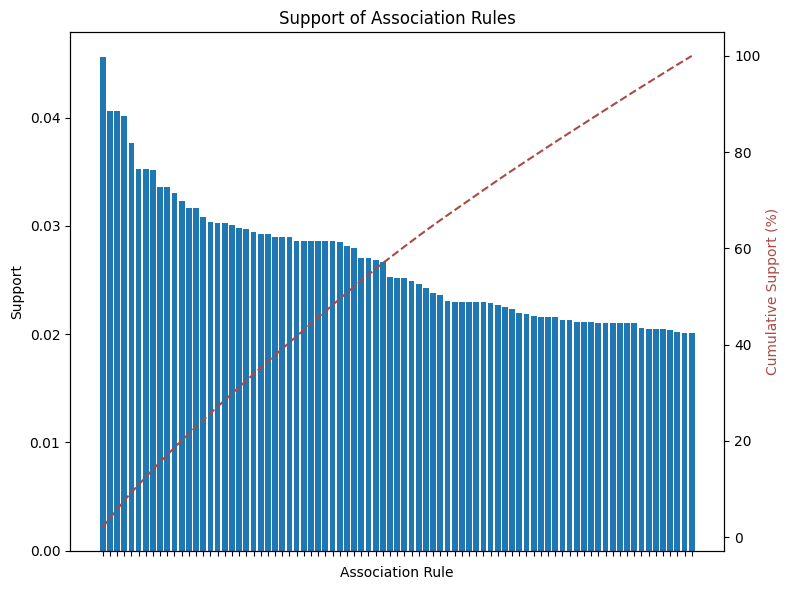

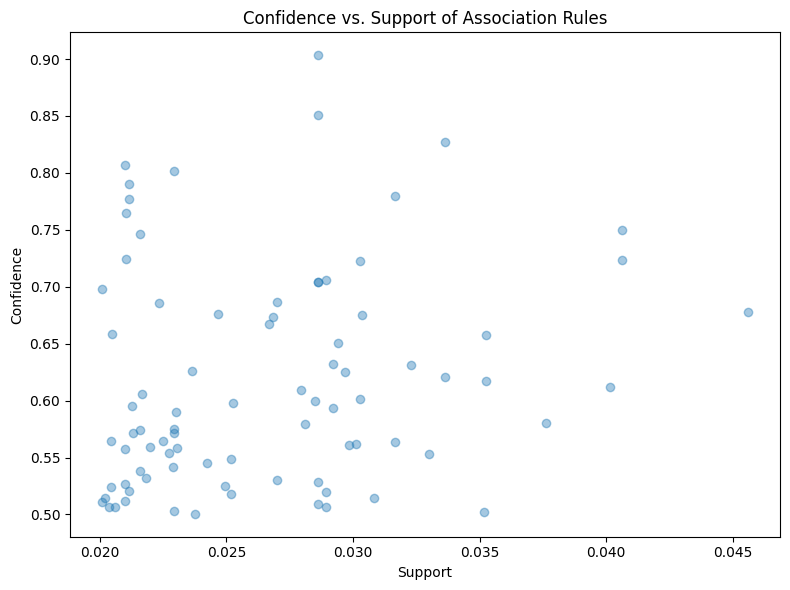

In [74]:
# Sort rules by support in descending order
sorted_rules = rules.sort_values(by='support', ascending=False)

# Calculate cumulative support
cumulative_support = np.cumsum(sorted_rules['support'] / np.sum(sorted_rules['support']) * 100)

# Bar plot for Support
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(range(len(sorted_rules)), sorted_rules['support'], align='center')
plt.xticks(range(len(sorted_rules)), ['' for _ in range(len(sorted_rules))])  # Remove x-axis labels
ax1.set_xlabel('Association Rule')
ax1.set_ylabel('Support')
ax1.set_title('Support of Association Rules')
# CDF plot for cumulative support
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_rules)), cumulative_support, color='#AA4A44', linestyle='--')
ax2.set_ylabel('Cumulative Support (%)', c='#AA4A44')

plt.tight_layout()
plt.show()

# Scatter plot for Confidence vs. Support
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.4)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support of Association Rules')
plt.tight_layout()
plt.show()

These visualizations explore association rules using two plots: a bar plot and a scatter plot.

The bar plot displays support values for each rule. The height of each bar represents how often the rule appears in the data. The x-axis doesn't have labels, focusing on support values.

The cumulative distribution function (CDF) plot shows how support accumulates across rules as a percentage. A red dashed line connects these cumulative values, giving insights into the support's accumulation.

The scatter plot presents the relationship between confidence and support for rules. Each point is a rule, with the x-axis showing support and the y-axis showing confidence. It helps us see how confidence changes with varying support levels.

These visualizations provide insights into support, confidence, and their connections within association rules, aiding in understanding rule strength and significance.

Cross-Selling and Upselling

In [75]:
# Filter association rules for cross-selling opportunities
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]

# Sort rules based on confidence and support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top cross-selling recommendations
top_cross_selling = cross_selling_rules.head(5)

# Filter association rules for upselling opportunities
upselling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) > 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
# Sort rules based on confidence and support
upselling_rules = upselling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top upselling recommendations
top_upselling = upselling_rules.head(5)

# Display cross-selling recommendations
print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")

# Display upselling recommendations
print("\nUpselling Recommendations:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")

Cross-Selling Recommendations:
Customers who bought 'PINK REGENCY TEACUP AND SAUCER' also bought 'GREEN REGENCY TEACUP AND SAUCER'.
Customers who bought 'PINK REGENCY TEACUP AND SAUCER' also bought 'ROSES REGENCY TEACUP AND SAUCER'.
Customers who bought 'WOODEN STAR CHRISTMAS SCANDINAVIAN' also bought 'WOODEN HEART CHRISTMAS SCANDINAVIAN'.
Customers who bought 'GREEN REGENCY TEACUP AND SAUCER' also bought 'ROSES REGENCY TEACUP AND SAUCER'.
Customers who bought 'WOODEN HEART CHRISTMAS SCANDINAVIAN' also bought 'WOODEN STAR CHRISTMAS SCANDINAVIAN'.

Upselling Recommendations:
For customers who bought 'PINK REGENCY TEACUP AND SAUCER', recommend the following upgrades: ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER.
For customers who bought 'GREEN REGENCY TEACUP AND SAUCER', recommend the following upgrades: PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER.
For customers who bought 'ROSES REGENCY TEACUP AND SAUCER', recommend the following upgrades: PINK RE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Upselling Recommendations

During the analysis of upselling opportunities, it was observed that multiple product recommendations were being made for the same item. To address this issue and provide more diverse recommendations, a modification was made to recommend only one product for each top item instead of recommending based on the top confidence values.

By implementing this change, we ensure that the upselling recommendations do not repeatedly suggest the same product to customers. This approach enhances the variety of product recommendations and increases the chances of cross-selling and upselling success.

The updated recommendation strategy focuses on identifying the top items and selecting a single recommended product for each of them. This adjustment aims to optimize the upselling strategy by suggesting different upgrades or add-on products to customers, resulting in a more compelling and varied range of recommendations.

In [77]:
top_upselling = upselling_rules.sort_values(['confidence', 'support'], ascending=False).drop_duplicates('antecedents')[:5]
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")

For customers who bought 'PINK REGENCY TEACUP AND SAUCER', recommend the following upgrades: ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER.
For customers who bought 'GREEN REGENCY TEACUP AND SAUCER', recommend the following upgrades: PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER.
For customers who bought 'ROSES REGENCY TEACUP AND SAUCER', recommend the following upgrades: PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Conclusion

In this project, we delved into association rules using the Apriori algorithm and Python's mlxtend library. This technique is all about uncovering connections between items in a dataset, which can be super useful for businesses.

We began by cleaning the data and identifying meaningful item associations through support and confidence thresholds. These associations can help businesses enhance their strategies, like suggesting products that are often bought together or offering upgrades for higher revenue.

We also considered metrics like support, confidence, lift, leverage, and conviction to gauge the strength and significance of these associations.

Overall, association rules analysis has various real-world applications, from marketing to improving customer satisfaction. It's essential to remember that our results are specific to this dataset and settings, but the approach can be customized for specific business needs and goals.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
